In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(2)

In [2]:
class NNet (nn.Module):
    def __init__(self, input_size, h1_size, h2_size, output_size, activation_func=nn.Sigmoid()):
        super(NNet, self).__init__()
        self.hidden_layer_1 = nn.Linear(input_size, h1_size)
        self.hidden_layer_2 = nn.Linear(h1_size, h2_size)
        self.output_layer = nn.Linear(h2_size, output_size)
        self.activation = activation_func

    def forward(self, x):
        x = self.activation(self.hidden_layer_1(x))
        x = self.activation(self.hidden_layer_2(x))
        x = self.output_layer(x)
        return x

In [ ]:
def train_model(model, criterion, optimizer, train_loader, validation_loader, epochs=10):
    i = 0
    results = {"training_loss": [], "validation_accuracy": []}
    print(f"Training ", end="")
    for epoch in range(epochs):
        model.train()
        for i, (x, y) in enumerate(train_loader):
            print(f".", end="")
            yhat = model(x.view(-1, 28 * 28))
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            results["training_loss"].append(loss.data.item())
        
        model.eval()
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()

        accuracy = 100 * (correct/len(validation_loader))
        results["validation_accuracy"].append(accuracy)
    print(f"End training")
    return results


In [4]:
input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

activation_tanh = nn.Tanh()
activation_relu = nn.ReLU()
model_sigmoid = NNet(input_dim, hidden_dim1, hidden_dim2, output_dim)
model_tanh = NNet(input_dim, hidden_dim1, hidden_dim2, output_dim, activation_tanh)
model_relu = NNet(input_dim, hidden_dim1, hidden_dim2, output_dim, activation_relu)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_sigmoid.parameters(), lr=0.01)
optimizer2 = torch.optim.SGD(model_tanh.parameters(), lr=0.01)
optimizer3 = torch.optim.SGD(model_relu.parameters(), lr=0.01)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:11<00:00, 844kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 245kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 1.89MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.57MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [25]:
training_results = train_model(model_sigmoid, criterion, optimizer, train_loader, validation_loader, 10)
training_results_tanch = train_model(model_tanh, criterion, optimizer2, train_loader, validation_loader, 10)
training_results_relu = train_model(model_relu, criterion, optimizer3, train_loader, validation_loader, 10)

Training ..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
Training ..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
Training ..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
..............................End
.....................

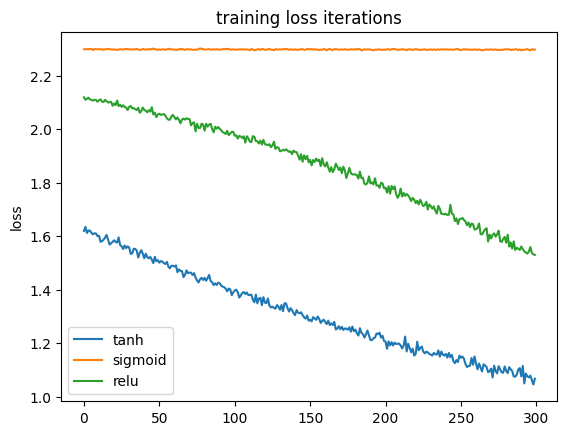

In [26]:
plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

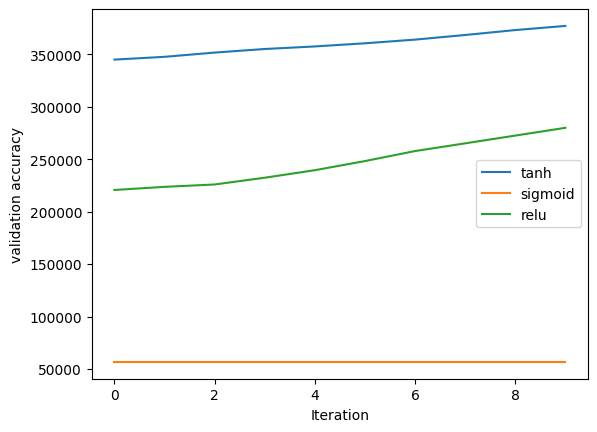

In [27]:
plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh')
plt.plot(training_results['validation_accuracy'], label = 'sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label = 'relu') 
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')   
plt.legend()

In [29]:
class Net(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
    
    # Prediction
    def forward(self, activation):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                activation = F.relu(linear_transform(activation))
            else:
                activation = linear_transform(activation)
        return activation
    